### This script contains the following:
    
    #### 1. Importing your libraries and data
    #### 2. Subsetting, wrangling, and cleaning time-series data
    #### 3. Time series analysis: decomposition
    #### 4. Testing for stationarity
    #### 5. Stationarizing the flavors_of_cacao Data

### 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings # This is a library that handles warnings
warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
    # feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') #This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
#   https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Configure API key 
    
quandl.ApiConfig.api_key = 'ef6U9zBqS7DpP3sny-Ak'

In [3]:
path = r'C:\Users\tee3a\3D Objects\Project 6'
data = pd.read_csv(os.path.join(path, '02 Data','Prepared Data for storing any manipulated data sets', 'flavors_of_cacao_checked1.csv'), index_col = False)

In [4]:
#### Data cleaning and Wrangling 
df4 = data.drop(columns = ['Unnamed: 0'])
df4_clean =  data[data['Broad Bean Origin'].isnull() == True]
df4_clean = data[data['Broad Bean Origin'].isnull() == False]
# Create a subset
data6 = df4_clean[['Review Date' , 'Rating']]
data6.shape

(1792, 2)

In [ ]:
df_dups6 =data6[data6.duplicated()]
df_dups7 = df_dups6.drop_duplicates()

df_dups7.shape

In [5]:

data6.head(5)

,Review Date,Rating
0,2016-01-01,3.75
1,2015-01-01,2.75
2,2015-01-01,3.00
3,2015-01-01,3.50
4,2015-01-01,3.50


In [6]:
type(data6)

pandas.core.frame.DataFrame

In [7]:
# Reset index so that you can use the "Review Date" column as a filter
data6 = data6.set_index('Review Date') # Set the Review Date as the index of the dataframe
data6.head()

,Rating
Review Date,
2016-01-01,3.75
2015-01-01,2.75
2015-01-01,3.00
2015-01-01,3.50
2015-01-01,3.50


In [8]:
df_dups6 =data6[data6.duplicated()]
df_dups7 = df_dups6.drop_duplicates()

In [9]:
df_dups7.sort_values(by='Review Date', inplace = True)

In [10]:
data6.shape

(1792, 1)

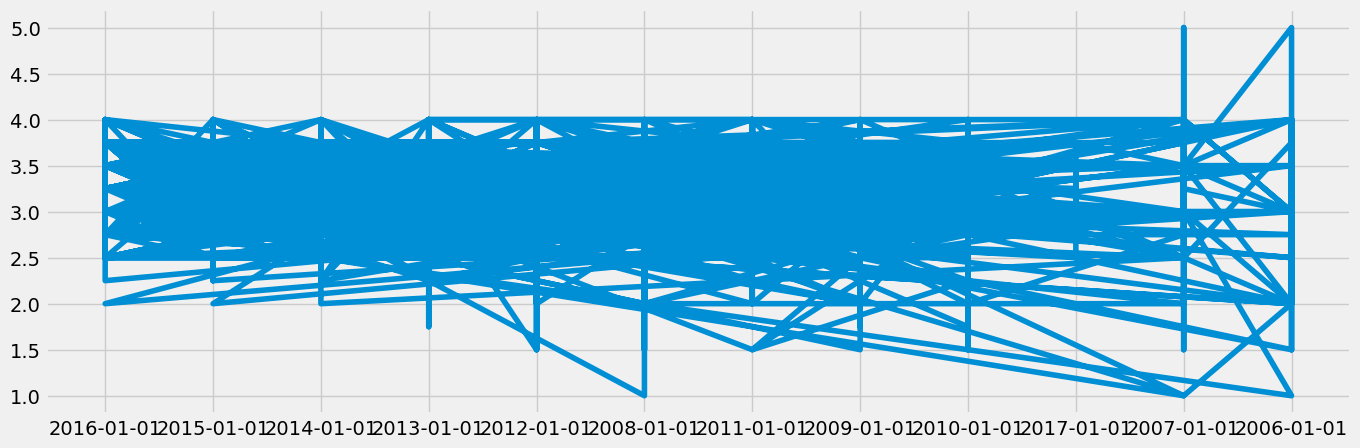

In [11]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!
plt.plot(data6)

### 2. Subsetting, wrangling, and cleaning time-series data

In [12]:
# Subsetting the data
data7 = df4_clean[['Review Date' , 'Rating']]
data7 = data7.loc[(data7['Review Date'] >= '2005-01-01') & (data7['Review Date'] < '2013-01-01')]
data7.shape 

(834, 2)

In [13]:
# Set the "Review Date" column as the index
from datetime import datetime
data_sub = data7
data_sub = data_sub.set_index('Review Date') # Set the Review Date as the index of the dataframe
data_sub.head()

,Rating
Review Date,
2012-01-01,3.50
2012-01-01,3.75
2008-01-01,3.50
2011-01-01,2.75
2011-01-01,3.25


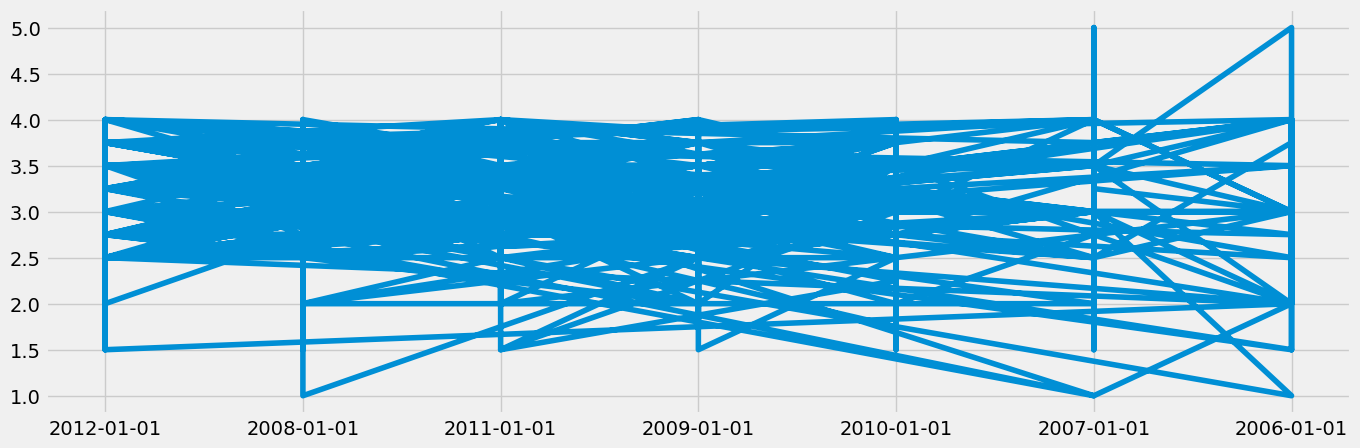

In [14]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [15]:
# Check for missing values (you shouldn't have any)
  
data_sub.isnull().sum()

Rating    0
dtype: int64

In [16]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()


821

#### I'm not sure why there are so many cases of duplicated data points in my set, and the graph looks very strange. First, you are unable to see the dates listed on the time-series, and then it is very clustered. Maybe that is simply how the plot will look because the number of injuries can vary largely from day to day

### 3. Time-series analysis: decomposition

In [17]:
# Decompose the time series using an additive model
    
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period=365)

In [18]:
from pylab import rcParams # This will define a fixed size for all special charts.
  
rcParams['figure.figsize'] = 18, 7

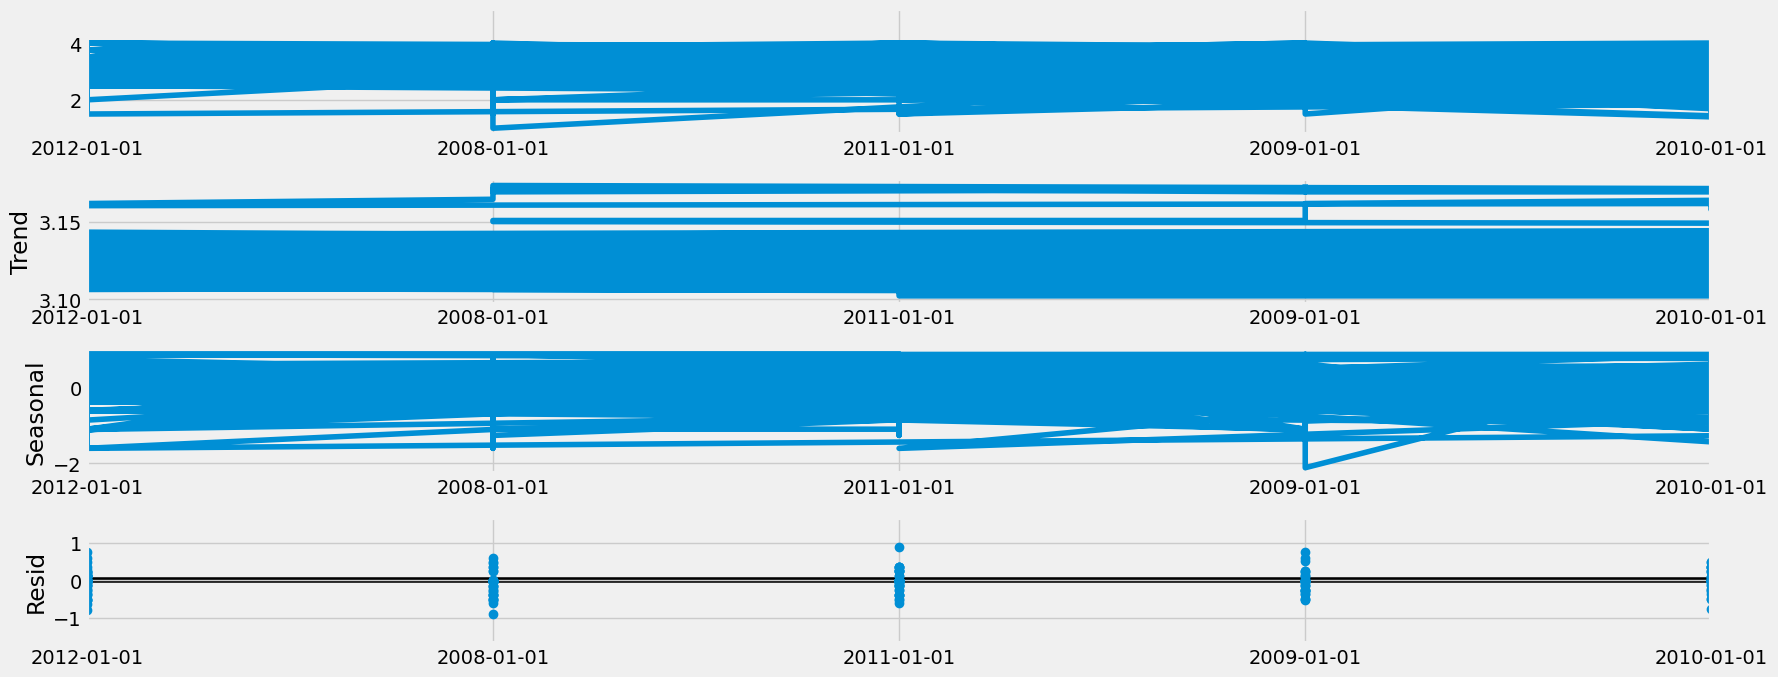

In [19]:
# Plot the separate components

decomposition.plot()
plt.show()

##### The first graph we see is the data itself with all its components, called the level.
##### The second graph is the trend in this graph.
##### The third component is seasonality. 
##### And finally we see in the last graph the noise.

### 4. Testing for stationarity

In [20]:
data_sub.dropna(inplace = True) 

In [21]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
    # an array of numbers. This is why you need to also define a function that prints the correct output from that array.
    
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function
    
def dickey_fuller(timeseries): # Define the function
        # Perform the Dickey-Fuller test:
        print ('Dickey-Fuller Stationarity test:')
        test = adfuller(timeseries, autolag='AIC')
        result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
        for key,Rating in test[4].items():
           result['Critical Value (%s)'%key] = Rating
        print (result)
    
# Apply the test using the function on the time series
dickey_fuller(data_sub['Rating'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.614047e+01
p-value                        4.681875e-29
Number of Lags Used            1.000000e+00
Number of Observations Used    8.320000e+02
Critical Value (1%)           -3.438234e+00
Critical Value (5%)           -2.865020e+00
Critical Value (10%)          -2.568623e+00
dtype: float64


##### Test Statistics= -1.614047e+01 > Critical value=-2.865020e+00
##### significance level = 4.681875e-29
##### The null hypothesis is not rejected
##### The data is non-stationary
   
##### This means that there is a unit root in the data

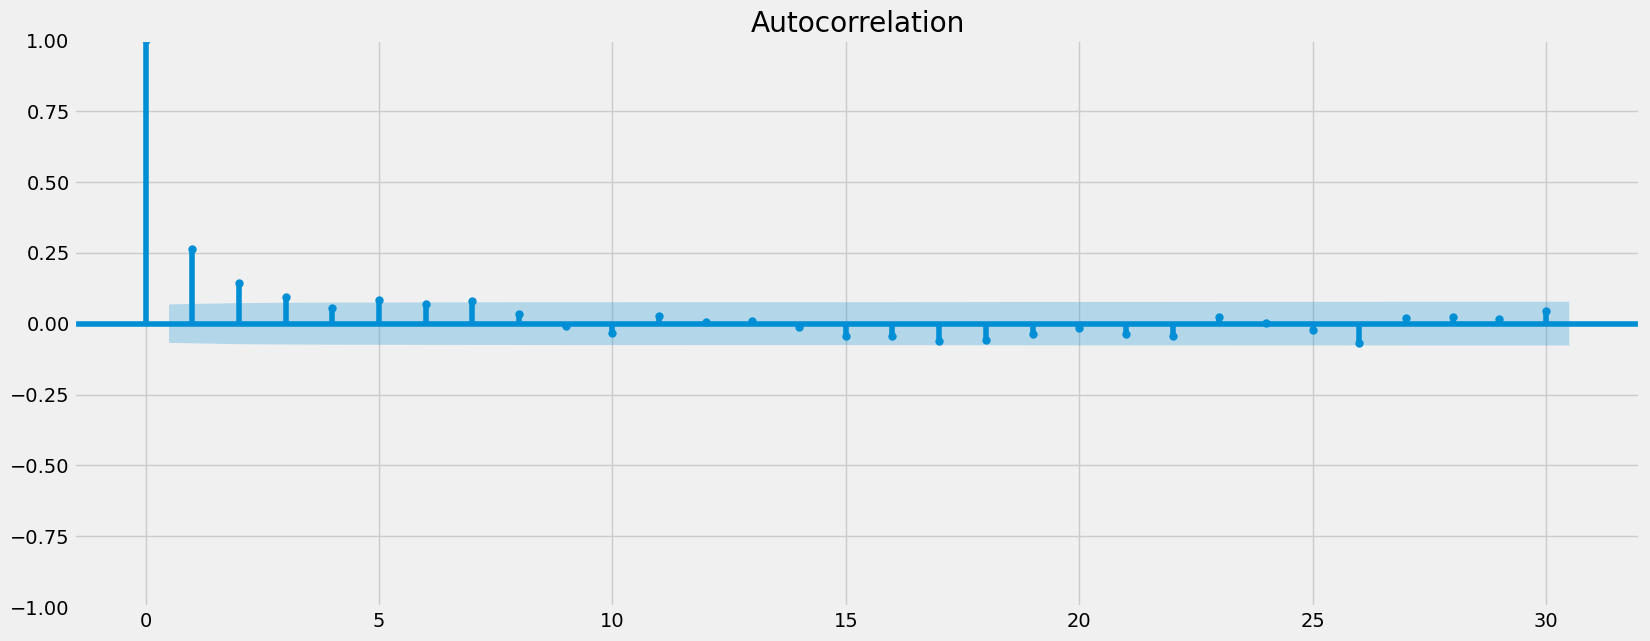

In [22]:
# Check out a plot of autocorrelations
  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

##### When the lines exceed the blue border of the confidence interval, it means that you have lags that are significantly correlated with each other. It is best to stop here beacuse e of the unspoken rule of thumb that you need at least ten significant lags (or ten vertical lines above the confidence interval). The stationarizings were not neceassary, but only made it worse, but I need to prove that.

 #### 5. Stationarizing the flavors_of_cacao Data

In [23]:
##### First Stationarizing using Differencing method
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff.head()

,Rating
Review Date,
2012-01-01,NaN
2012-01-01,0.25
2008-01-01,-0.25
2011-01-01,-0.75
2011-01-01,0.50


In [24]:
data_diff.columns

Index(['Rating'], dtype='object')

In [25]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing.
# You need to remove these or you won't be able to run the Dickey-Fuller test.

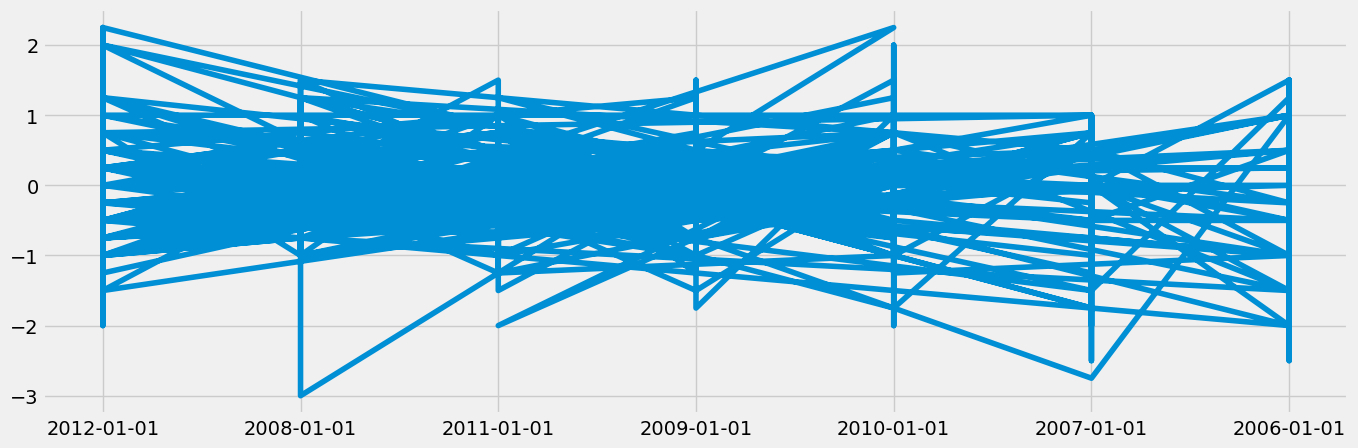

In [26]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [27]:
##### Now let's try the Dickey-Fuller test again
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.016697e+01
p-value                        7.255806e-18
Number of Lags Used            2.100000e+01
Number of Observations Used    8.110000e+02
Critical Value (1%)           -3.438439e+00
Critical Value (5%)           -2.865110e+00
Critical Value (10%)          -2.568671e+00
dtype: float64


##### Test Statistics= -1.016697e+01 > Critical value=-2.865110e+00
##### significance level = 7.255806e-18
##### The null hypothesis is not rejected
##### The data is non-stationary
   
##### This means that there is a unit root in the data

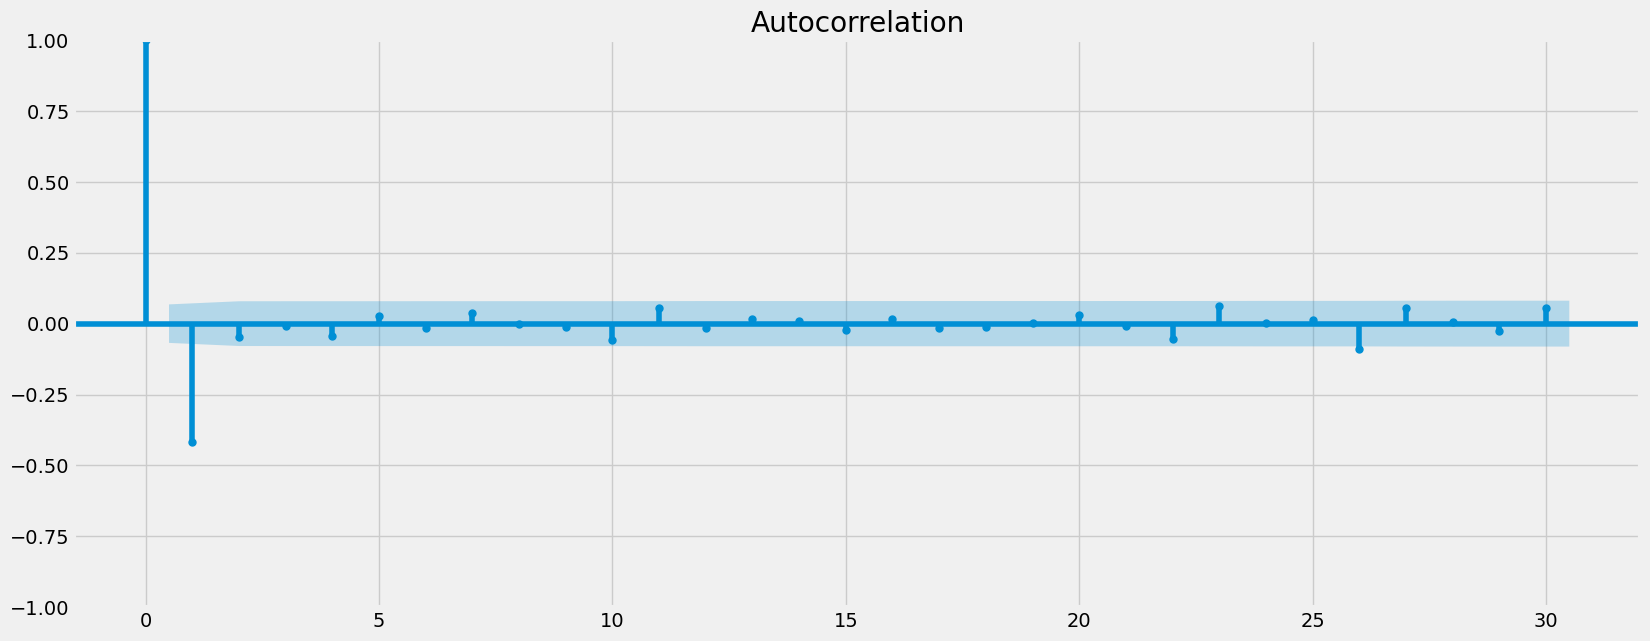

In [28]:
plot_acf(data_diff)
plt.show()

In [29]:
##### Second Stationarizing using Differencing method
data_diff1 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff1.head()

,Rating
Review Date,
2012-01-01,NaN
2008-01-01,-0.50
2011-01-01,-0.50
2011-01-01,1.25
2011-01-01,-0.25


In [30]:
data_diff1.columns

Index(['Rating'], dtype='object')

In [31]:
data_diff1.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing.
# You need to remove these or you won't be able to run the Dickey-Fuller test.

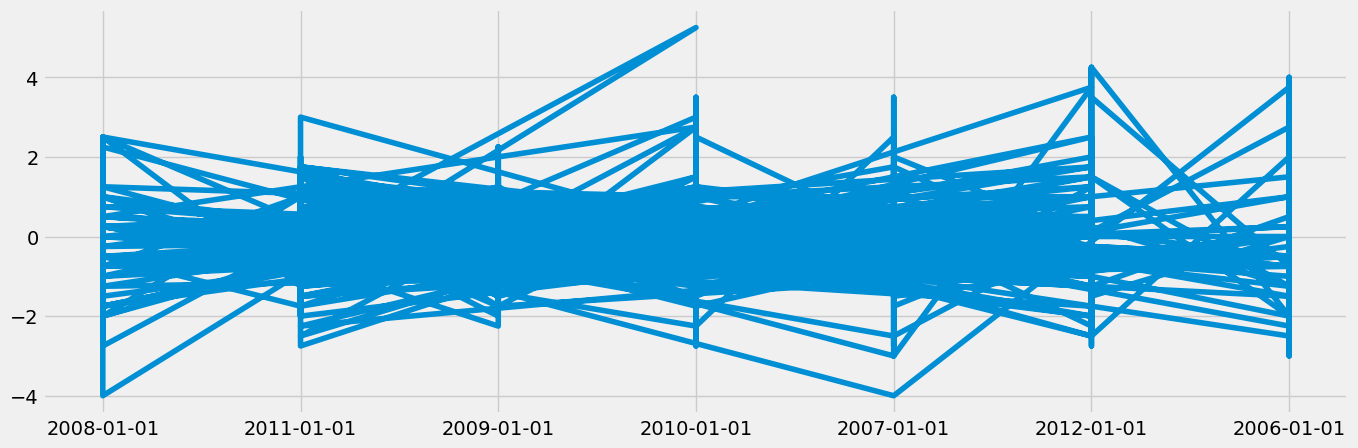

In [32]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff1)

In [33]:
dickey_fuller(data_diff1)

Dickey-Fuller Stationarity test:
Test Statistic                -1.176039e+01
p-value                        1.151717e-21
Number of Lags Used            2.100000e+01
Number of Observations Used    8.100000e+02
Critical Value (1%)           -3.438449e+00
Critical Value (5%)           -2.865115e+00
Critical Value (10%)          -2.568674e+00
dtype: float64


Test Statistics= -1.298564e+01 > Critical value=-2.865115e+00
significance level = 2.882238e-24
The null hypothesis cant be rejected
The data is non-stationary
This means that there is a unit root in the data

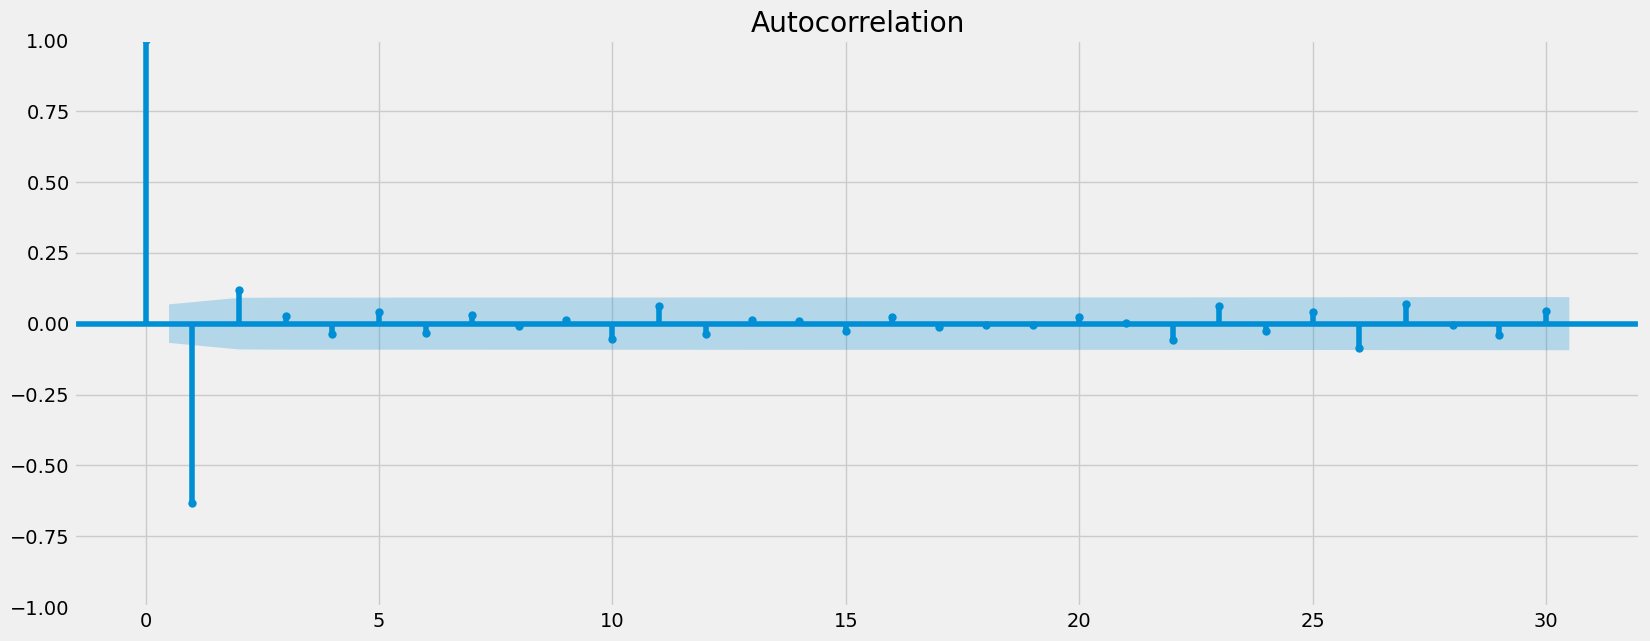

In [34]:
plot_acf(data_diff1)
plt.show()

##### The autocorrelation plot keep fluantuating and therefore, it is not perfect. The stationarity is very weak. I could keep going on and on, but it would keep going up and coming down.

In [35]:
#### Exporting the data
data_sub.to_pickle(os.path.join(path, 'flavors_of_cacao_Time-Series.pkl'))